# Problem Statement

2.	The dataset consists of quarterly sales data of Coca-Cola from 1986 to 1996. Predict sales for the next two years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

Lets load our dataset and important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (12,15)

In [2]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data.shape

(42, 2)

42 rows and 2 columns

In [3]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [12]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

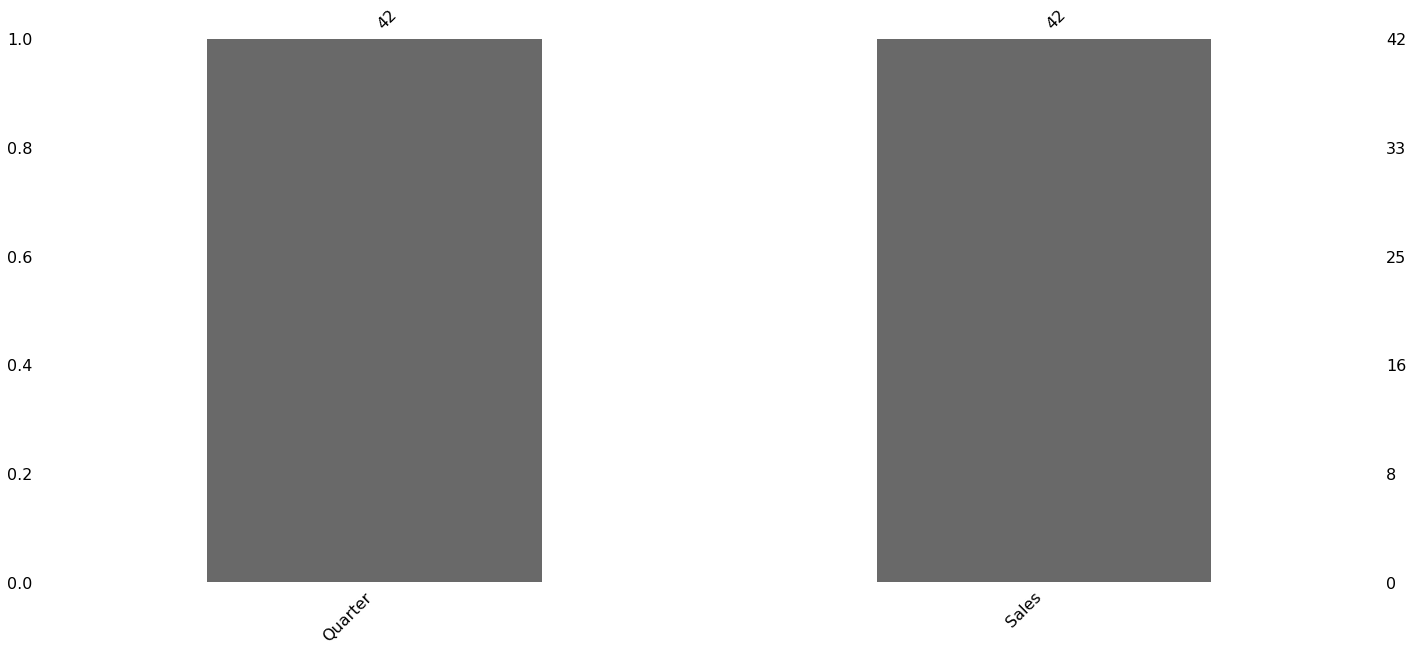

In [4]:
msno.bar(data)

No missing value in our dataset

In [5]:
backup = data.copy()

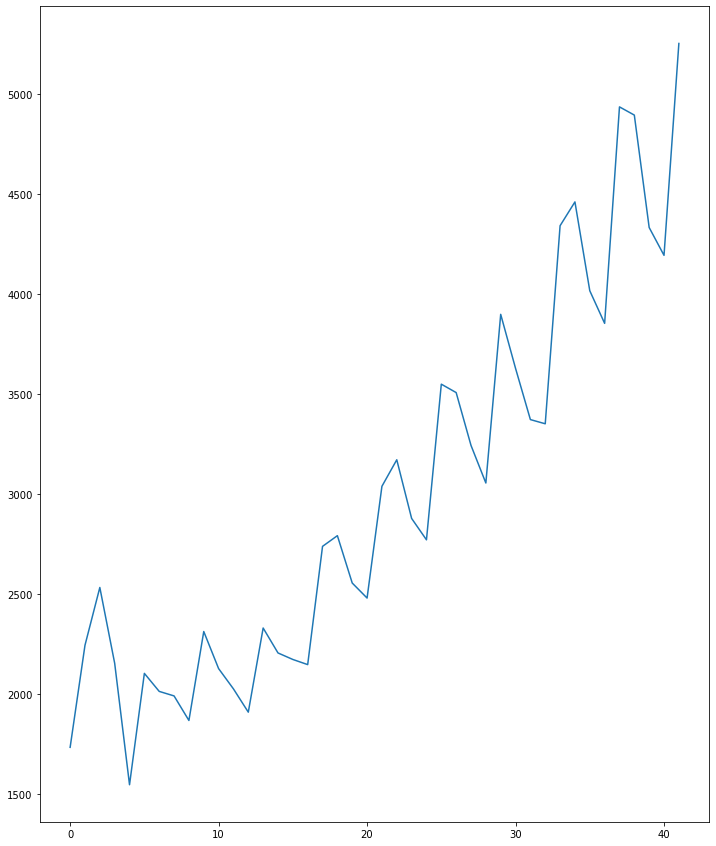

In [6]:
plt.plot(data.Sales)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
# Splitting our data into train and test

train = data.head(34)
test = data.tail(8)

In [33]:
# Creating a function which calculates MAPE values for test data

def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [46]:
# Moving averages for the Time Series

mv_pred = data['Sales'].rolling(4).mean()
mv_pred.tail(4)
MAPE(mv_pred.tail(4), test.Sales)

8.525442688640576

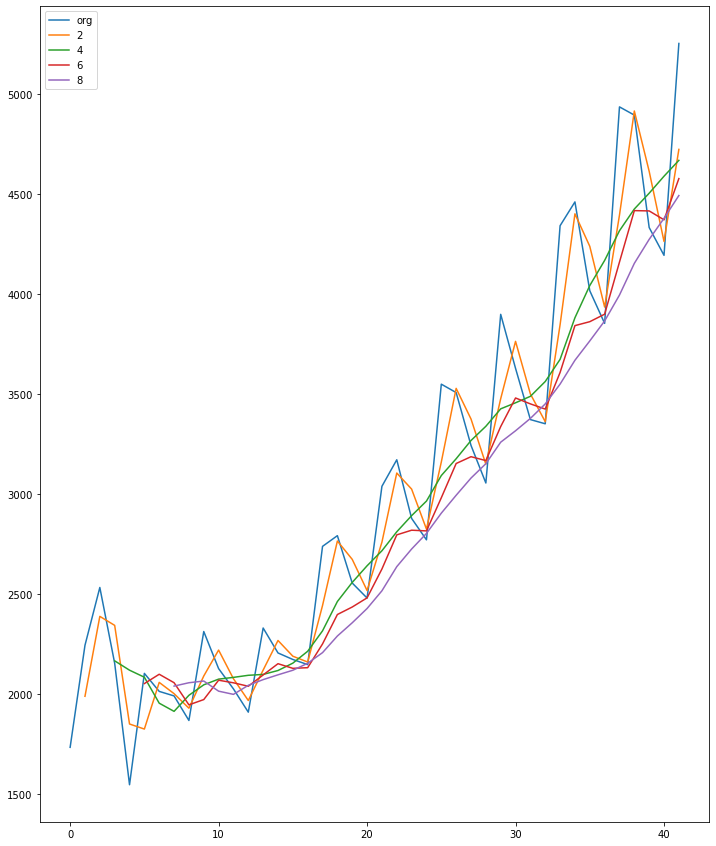

In [35]:
# plot with moving averages

data.Sales.plot(label='org')
for i in range(2,10,2):
    data['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc=2)

0             NaN
1             NaN
2             NaN
3             NaN
4     2049.251060
5     2061.931934
6     2040.881060
7     2007.529873
8     2022.195560
9     2059.041685
10    2085.225435
11    2108.625934
12    2137.466497
13    2181.522997
14    2249.654872
15    2324.255809
16    2392.977746
17    2472.898247
18    2577.518497
19    2681.930935
20    2764.978123
21    2854.628998
22    2950.000123
23    3037.693623
24    3116.623373
25    3206.279811
26    3288.552374
27    3347.982562
28    3415.107499
29    3500.857499
30    3609.919999
31    3717.803750
32    3816.000000
33    3930.687500
34    4074.625000
35    4213.750000
36    4326.375000
37    4435.937500
38            NaN
39            NaN
40            NaN
41            NaN
Name: trend, dtype: float64
0    -285.126048
1     335.499310
2     232.529295
3    -110.656489
4    -352.265115
5     271.535333
6      59.384357
7    -150.900643
8    -285.126048
9     335.499310
10    232.529295
11   -110.656489
12   -352.26

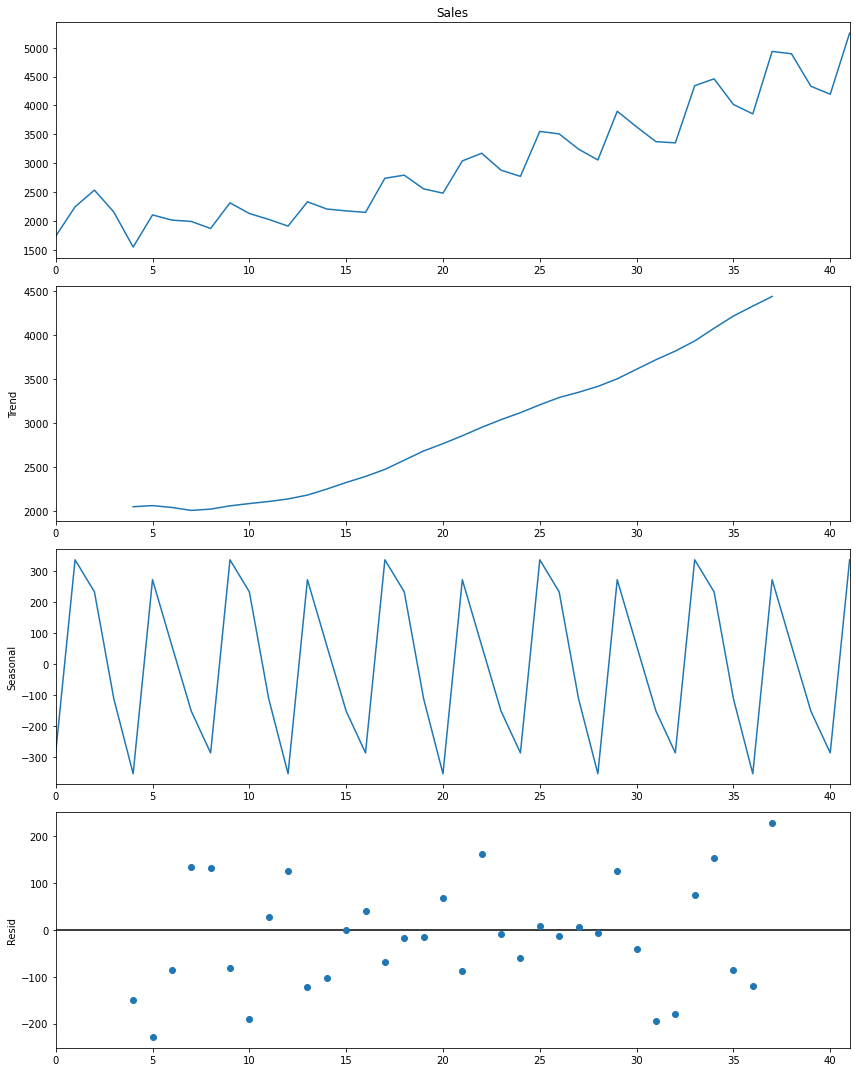

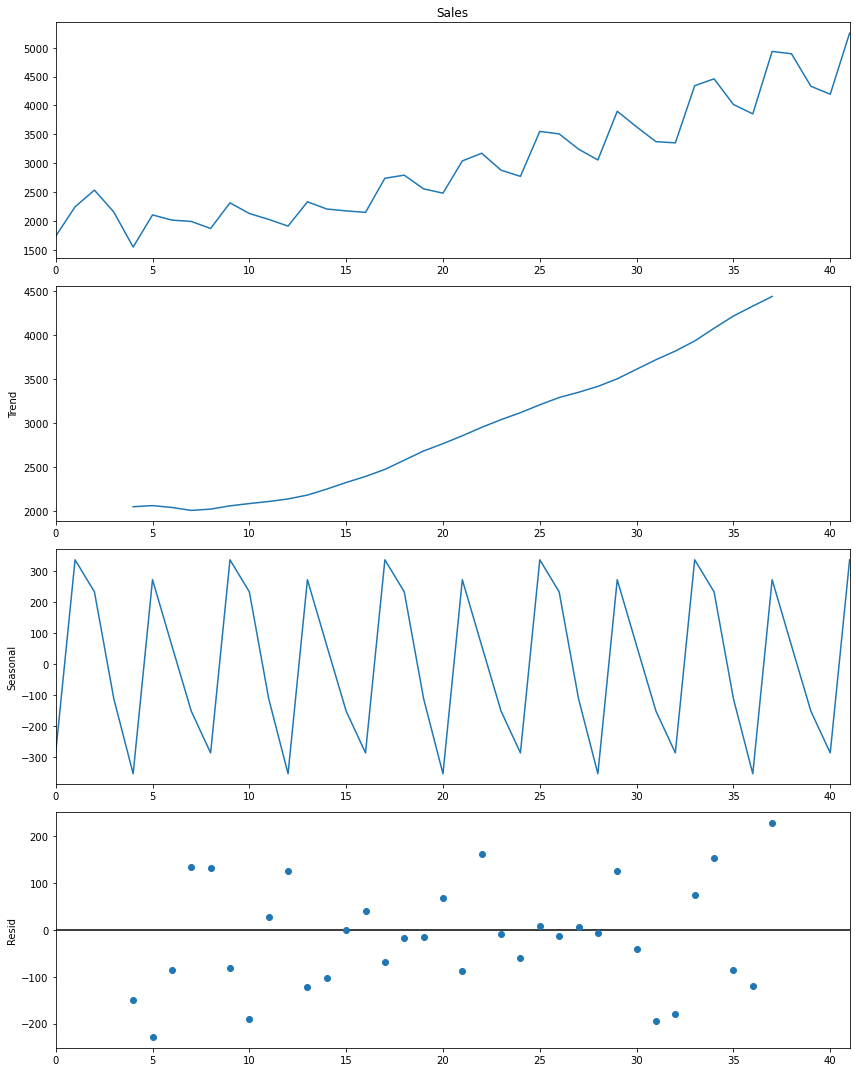

In [37]:
# Time series decomposition chart

decompose_ts_add = seasonal_decompose(data.Sales, model='additive',period=8)
print(decompose_ts_add.trend)
print(decompose_ts_add.seasonal)
print(decompose_ts_add.resid)
print(decompose_ts_add.observed)
decompose_ts_add.plot()

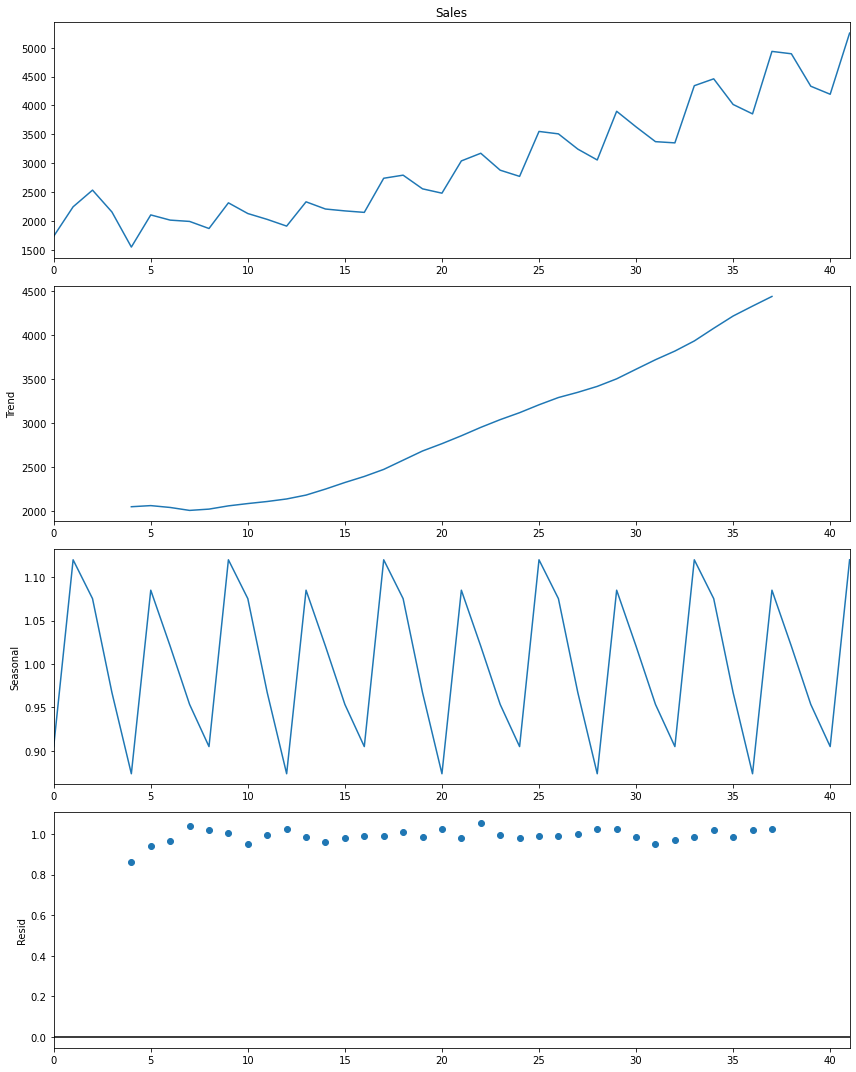

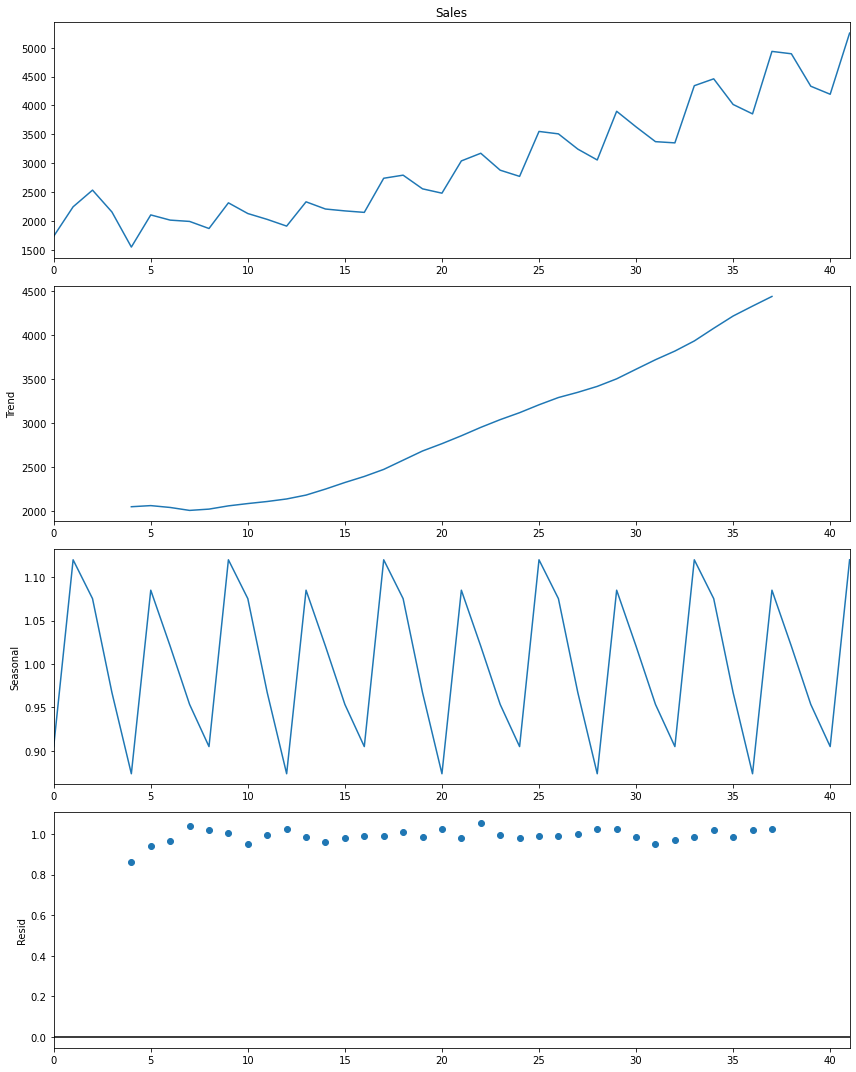

In [38]:
# Lets plot Multiplicative plot

decompose_ts_mul = seasonal_decompose(data.Sales, model = 'multiplicative', period=8)
decompose_ts_mul.plot()

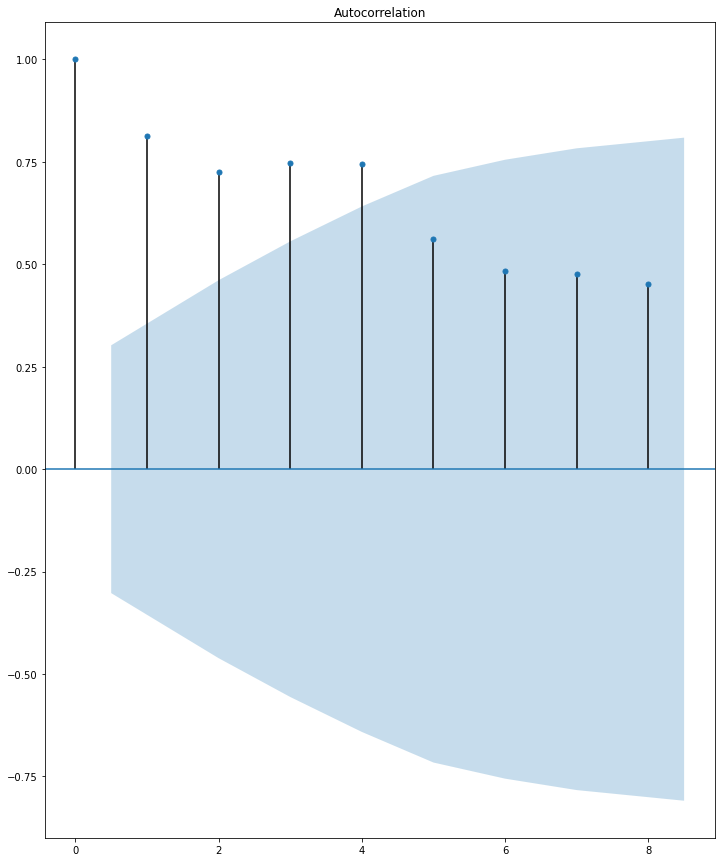

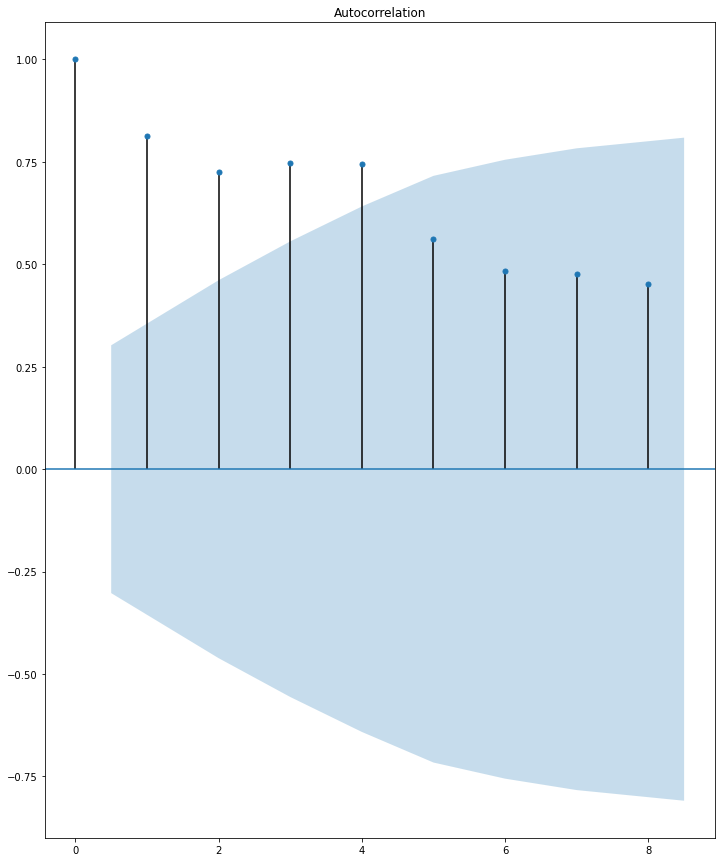

In [39]:
# ACF and PACF plot on data

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales, lags=8)

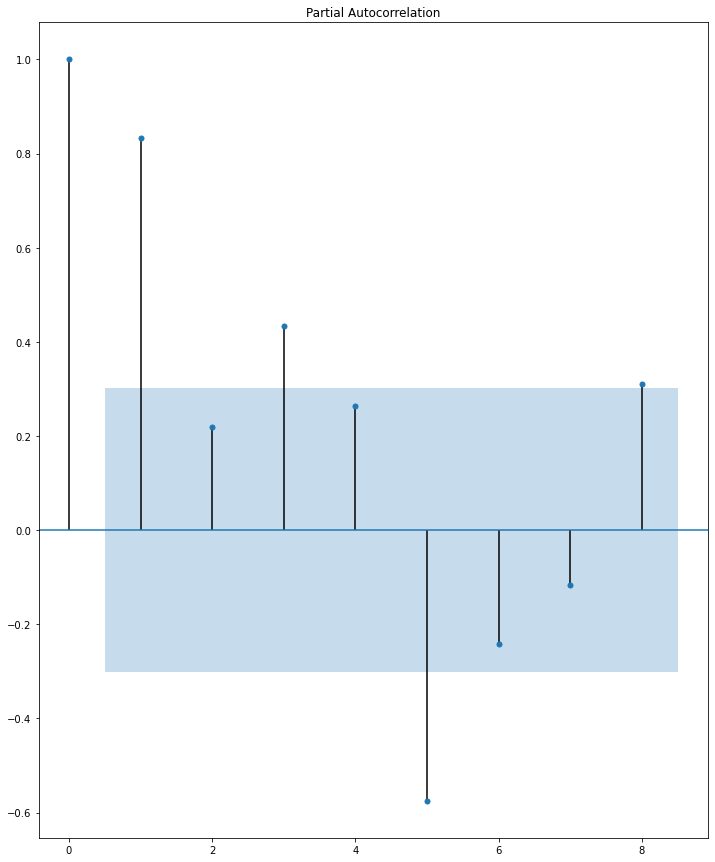

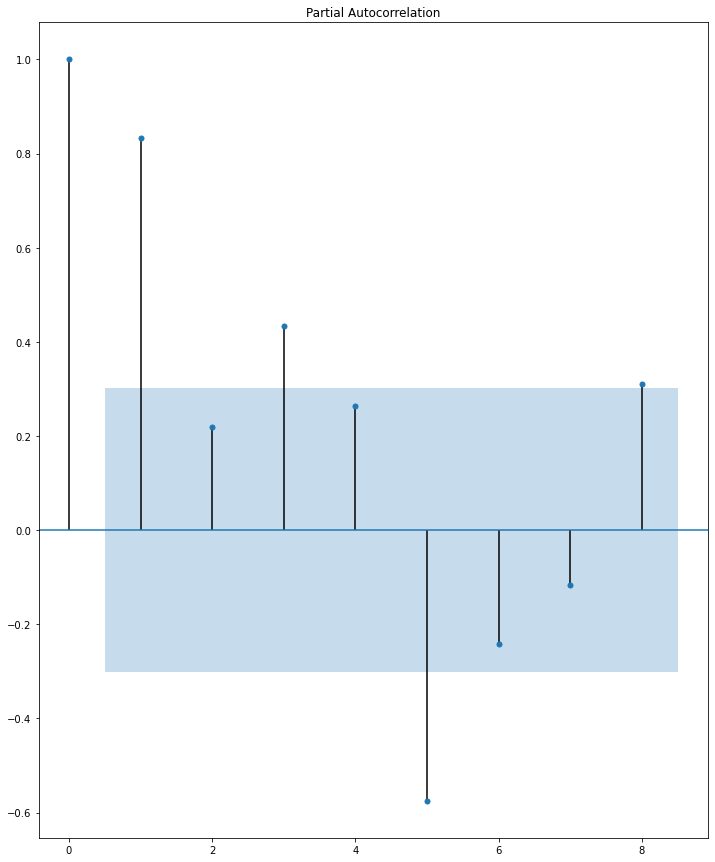

In [40]:
tsa_plots.plot_pacf(data.Sales, lags=8)

Lets build our models

#### Simple Exponential Method

In [41]:
ses_model = SimpleExpSmoothing(train['Sales']).fit()
pred_ses = ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

13.843120282285053

#### Holts Method

In [42]:
hw_model = Holt(train['Sales']).fit()
pred_hw = hw_model.predict(start = test.index[0], end=test.index[-1])
MAPE(pred_hw, test.Sales)

8.398160140045904

#### Holts Winter exponential smoothing with additive seasonality and additive trend

In [43]:
hew_model_add_add = ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred_hew_model_add_add = hew_model_add_add.predict(start=test.index[0],end = test.index[-1])
MAPE(pred_hew_model_add_add,test.Sales)

6.606662720348559

#### Holts Winter exponential smoothing with multiplicative seasonality and additive trend

In [44]:
hew_model_mul_add = ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit()
pred_hew_model_mul_add = hew_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hew_model_mul_add,test.Sales)

6.776221415710468

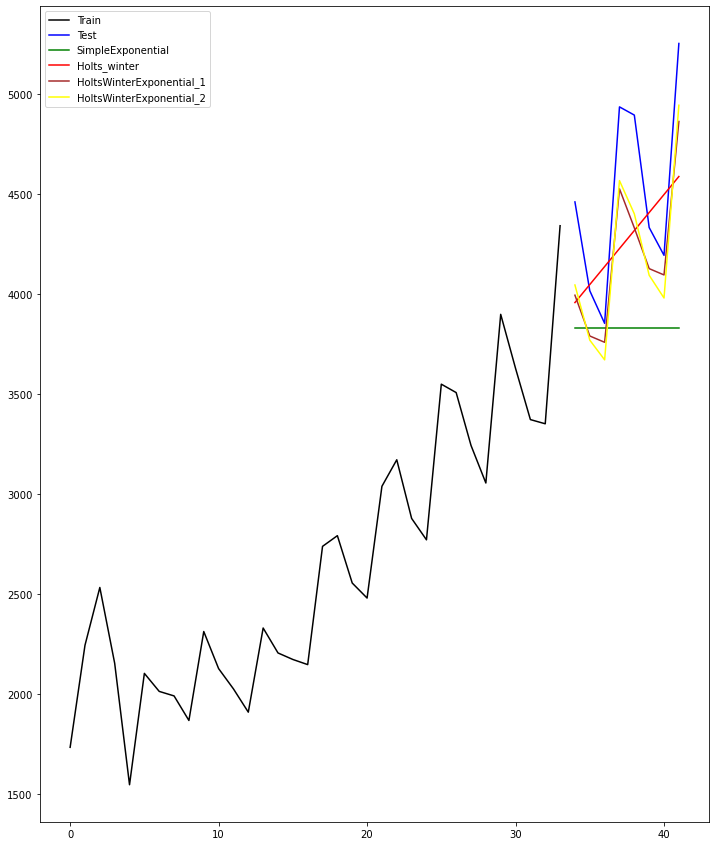

In [45]:
plt.plot(train.index, train["Sales"], label='Train',color="black")
plt.plot(test.index, test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hew_model_add_add.index,pred_hew_model_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hew_model_mul_add.index,pred_hew_model_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [47]:
# Final model of Holt Winters Multiplicative Seasonality and Additive Trend on 100% data

In [48]:
final_model = ExponentialSmoothing(data['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit()

In [50]:
# Loading the data where we need to forecast for 2 years

In [51]:
new_data = pd.read_excel('CocaCola_Sales_Forecast.xlsx')
new_data

,Quarter,Sales
0,Q3_96,NaN
1,Q4_96,NaN
2,Q1_97,NaN
3,Q2_97,NaN
4,Q3_97,NaN
5,Q4_97,NaN
6,Q1_98,NaN
7,Q2_98,NaN


In [52]:
newdata_pred = final_model.predict(start=new_data.index[0],end=new_data.index[-1])
newdata_pred

0    1723.415418
1    2157.039915
2    2178.482313
3    2238.346465
4    2036.841903
5    2001.601060
6    2020.962731
7    1784.002449
dtype: float64

In [53]:
new_data["Sales"] = pd.Series(newdata_pred)
new_data

,Quarter,Sales
0,Q3_96,1723.415418
1,Q4_96,2157.039915
2,Q1_97,2178.482313
3,Q2_97,2238.346465
4,Q3_97,2036.841903
5,Q4_97,2001.601060
6,Q1_98,2020.962731
7,Q2_98,1784.002449


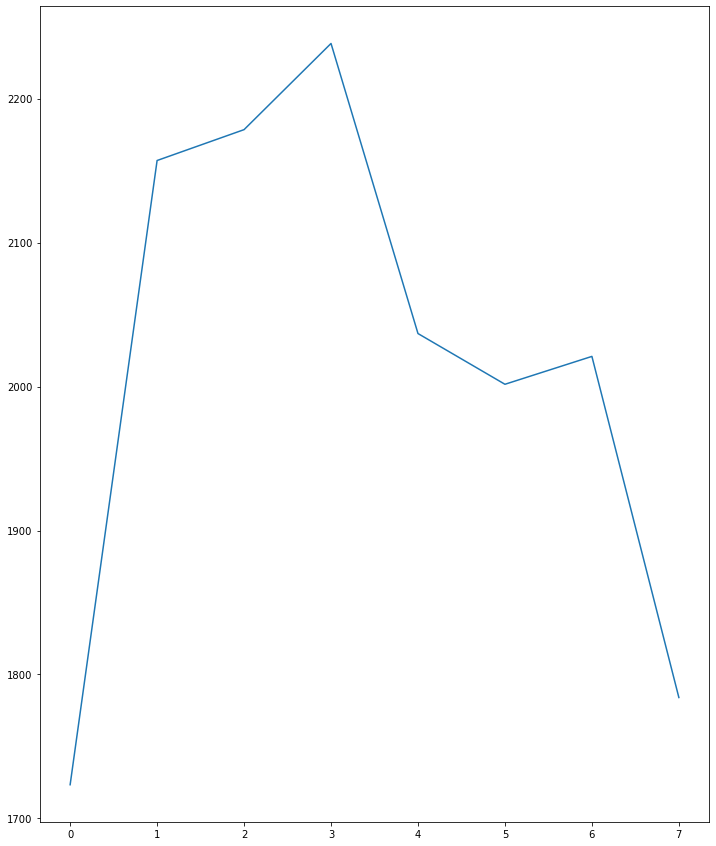

In [54]:
plt.plot(new_data.Sales)

We have sucessfully forecasted Coca-Cola Sales numbers for 8 quarters